In [23]:
import numpy as np
import matplotlib.pyplot as plt

Given a set of points \((x_1, x_2, \dots, x_n)\), the goal is to partition the \(n\) points into \(k\) subsets \(S = \{S_1, S_2, \dots, S_k\}\) (\(k \leq n\)) while minimizing the distance between the points within each partition:  

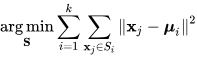
  
Hence we are looking to minimize the following loss function :

In [41]:
def loss(S, mu):
    return sum(np.sum((S_i - mu_i)**2) for S_i, mu_i in zip(S, mu))

In the K-means algorithm, the number K of clusters has to be defined before execution.  
We wil use random data points to test this implementation.

In [38]:
K = 4 # number of clusters
D = 2 # number of dimensions

X = np.random.rand(100, D) # random data points

We could use a threshold on the loss in order to stop the algorithm but we will choose to explicit the number of iterations.  
  
1. Centroids are randomy initialized (was upgraded with K-means++).  
2. Data points are assigned to the closest centroid using Voronoi partition :  
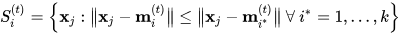
3. Centroid coordinates are computed thanks to the following formula :  
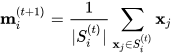

In [42]:
centroids = np.random.rand(K, D) # randomly initialize centroids

for i in range(10):
    S = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X]) # 1 : assign each point to the closest centroid (Voronoi partition)
    centroids = np.array([np.mean(X[S == k], axis=0) for k in range(K)]) # 2 : update centroids to the mean of the points assigned to them
    print(f"Loss ({i}) : {loss(X, centroids)}")

Loss (0) : 0.9971682178377701
Loss (1) : 1.037882358238863
Loss (2) : 1.0431311757364694
Loss (3) : 1.0542848190066063
Loss (4) : 1.094157632404656
Loss (5) : 1.1361657486739538
Loss (6) : 1.1801055626860224
Loss (7) : 1.257198124761822
Loss (8) : 1.263222434581727
Loss (9) : 1.262277328736133


Loss stalls on the 2 last steps which means we minimized the loss function.  
We print the data points, the clusters they belong to as wall as the centroids to check the results. 

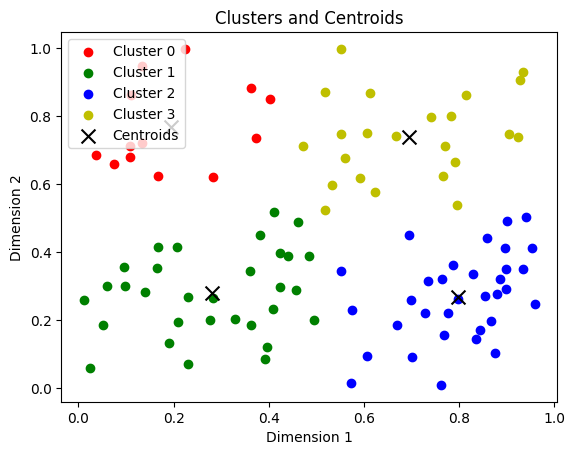

In [43]:
colors = ['r', 'g', 'b', 'y']
for k in range(K):
    cluster_points = X[S == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f'Cluster {k}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Clusters and Centroids')
plt.show()